### about Dataset

#### This CSV file contains 10,000 rows simulating how students interact with AI assistants (like ChatGPT) across different academic tasks.

#### Each row represents a single session, including attributes such as:

#### Academic context – student level (e.g., Undergraduate), discipline (e.g., Computer Science)

#### Session details – session length, number of prompts used, task type (e.g., coding, writing)

#### AI experience – perceived assistance quality, session outcome, satisfaction rating, and whether the student chose to reuse the tool

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv("ai_assistant_usage_student_life.csv")

In [3]:
# Checking datset
df.head()

,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating
0,SESSION00001,Undergraduate,Computer Science,2024-11-03,31.20,11,Studying,2,Assignment Completed,True,1.0
1,SESSION00002,Undergraduate,Psychology,2024-08-25,13.09,6,Studying,3,Assignment Completed,True,2.0
2,SESSION00003,Undergraduate,Business,2025-01-12,19.22,5,Coding,3,Assignment Completed,True,3.3
3,SESSION00004,Undergraduate,Computer Science,2025-05-06,3.70,1,Coding,3,Assignment Completed,True,3.5
4,SESSION00005,Undergraduate,Psychology,2025-03-18,28.12,9,Writing,3,Assignment Completed,True,2.9


In [4]:
# Checking Information About Dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SessionID           10000 non-null  object 
 1   StudentLevel        10000 non-null  object 
 2   Discipline          10000 non-null  object 
 3   SessionDate         10000 non-null  object 
 4   SessionLengthMin    10000 non-null  float64
 5   TotalPrompts        10000 non-null  int64  
 6   TaskType            10000 non-null  object 
 7   AI_AssistanceLevel  10000 non-null  int64  
 8   FinalOutcome        10000 non-null  object 
 9   UsedAgain           10000 non-null  bool   
 10  SatisfactionRating  10000 non-null  float64
dtypes: bool(1), float64(2), int64(2), object(6)
memory usage: 791.1+ KB


In [5]:
# Checking a descriptive or statistical information of dataset
df.describe()

,SessionLengthMin,TotalPrompts,AI_AssistanceLevel,SatisfactionRating
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,19.846467,5.607500,3.479500,3.417780
std,13.897302,4.648764,0.991805,1.143331
min,0.030000,1.000000,1.000000,1.000000
25%,9.630000,2.000000,3.000000,2.600000
50%,16.650000,4.000000,4.000000,3.500000
75%,26.670000,8.000000,4.000000,4.400000
max,110.810000,39.000000,5.000000,5.000000


### 1 : Univariate analysis

In [6]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,5)

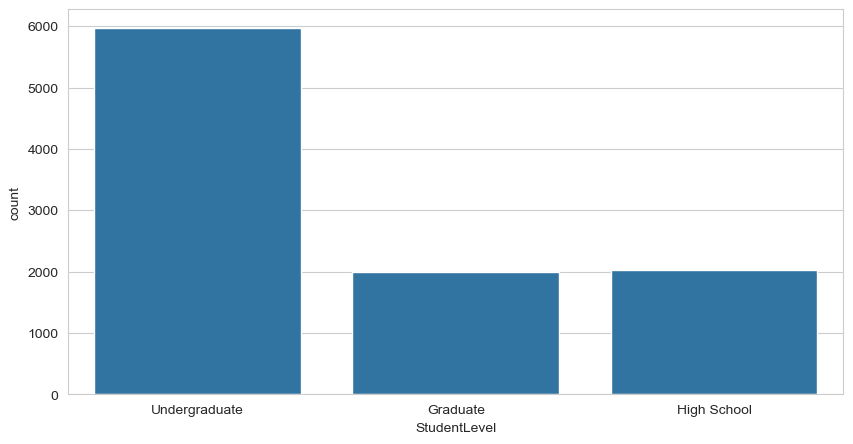

In [7]:
sns.countplot(x="StudentLevel",data=df)
plt.show()

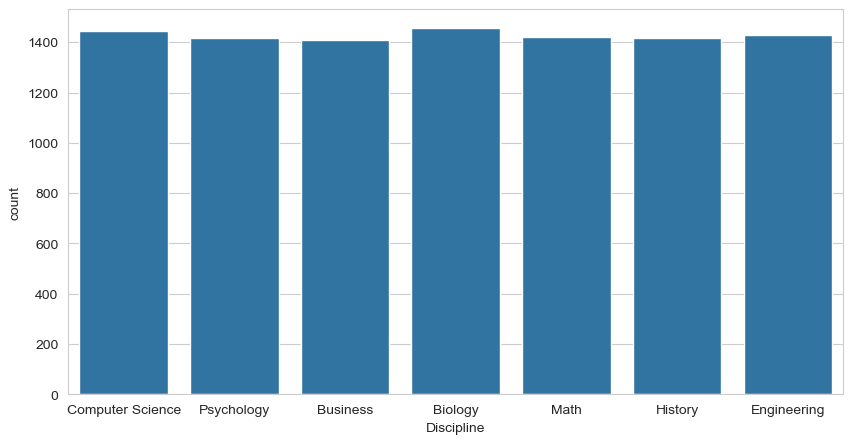

<Figure size 800x500 with 0 Axes>

In [8]:
sns.countplot(x="Discipline",data=df)
plt.figure(figsize=(8,5))
plt.show()

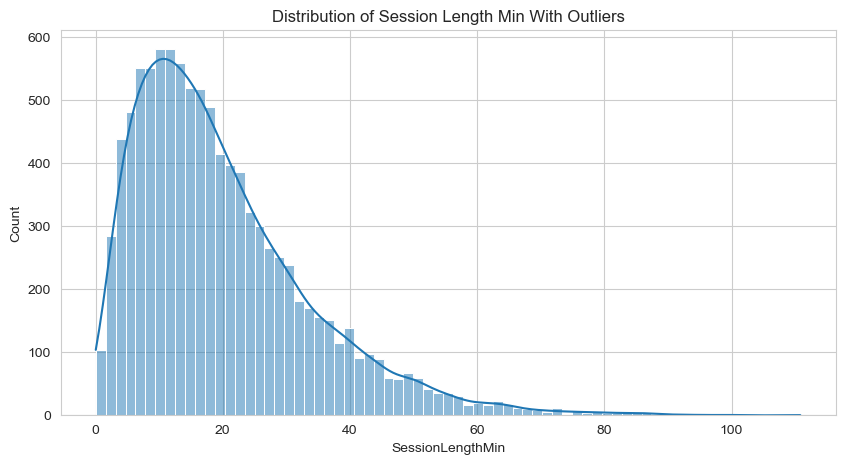

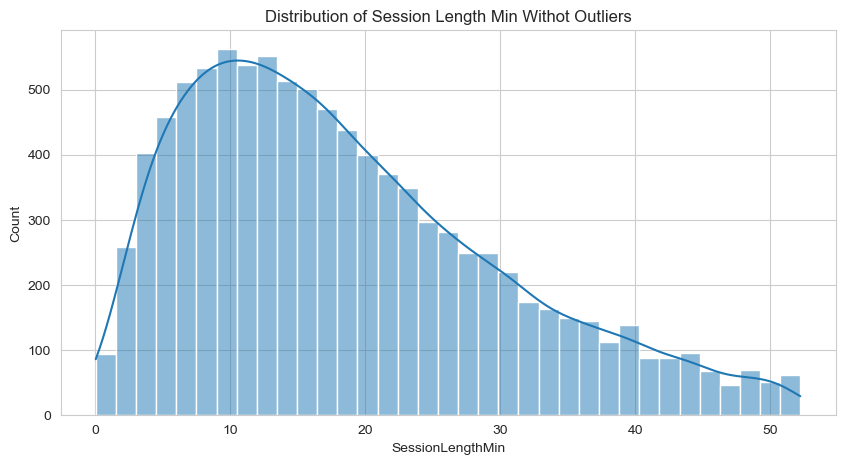

In [9]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

df_clean = remove_outliers_iqr(df, 'SessionLengthMin')

sns.histplot(df['SessionLengthMin'], kde=True)
plt.title('Distribution of Session Length Min With Outliers')
plt.show()


sns.histplot(data=df_clean['SessionLengthMin'], kde=True)
plt.title('Distribution of Session Length Min Withot Outliers')
plt.show()


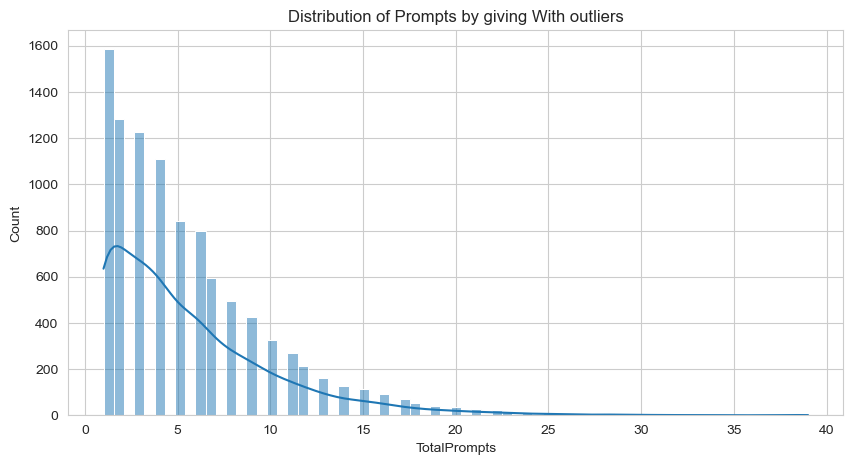

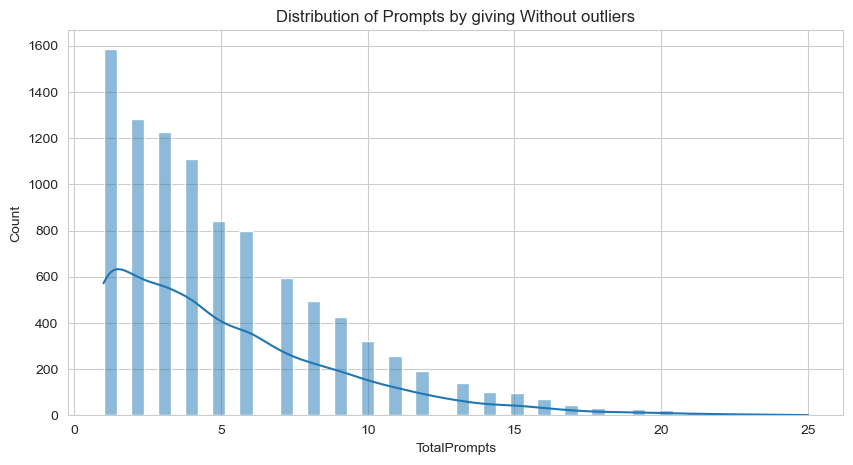

In [10]:
sns.histplot(df['TotalPrompts'], kde=True)
plt.title('Distribution of Prompts by giving With outliers')
plt.show()

sns.histplot(data=df_clean['TotalPrompts'], kde=True)
plt.title('Distribution of Prompts by giving Without outliers')
plt.show()

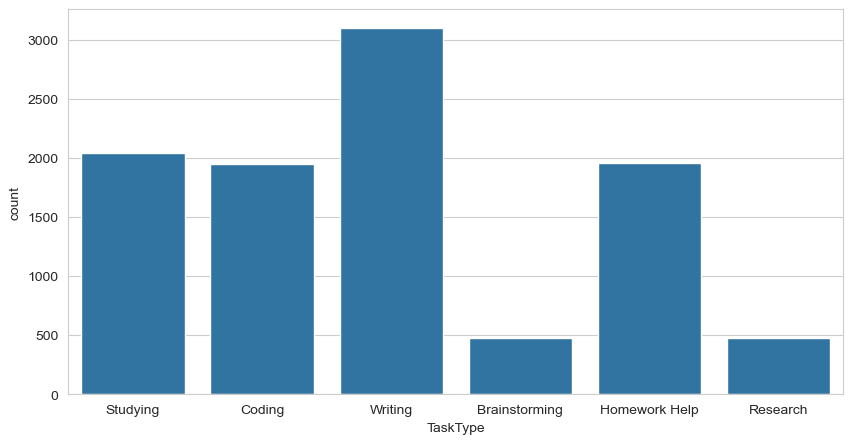

<Figure size 800x500 with 0 Axes>

In [11]:
sns.countplot(x="TaskType",data=df)
plt.figure(figsize=(8,5))
plt.show()

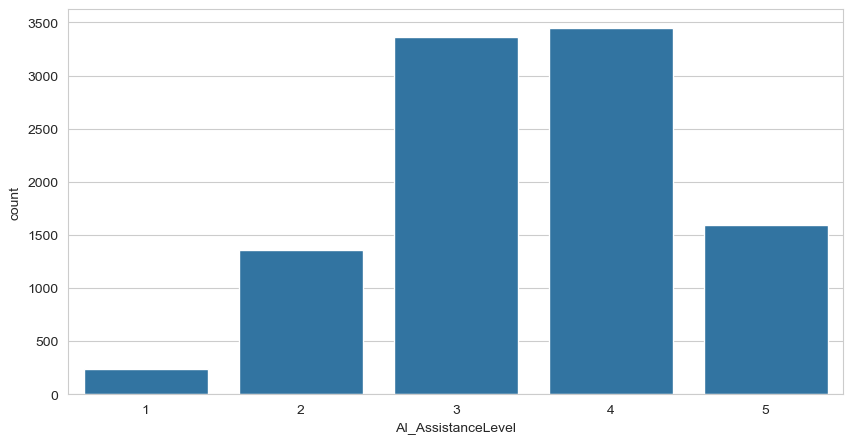

<Figure size 800x500 with 0 Axes>

In [12]:
sns.countplot(x="AI_AssistanceLevel",data=df)
plt.figure(figsize=(8,5))
plt.show()

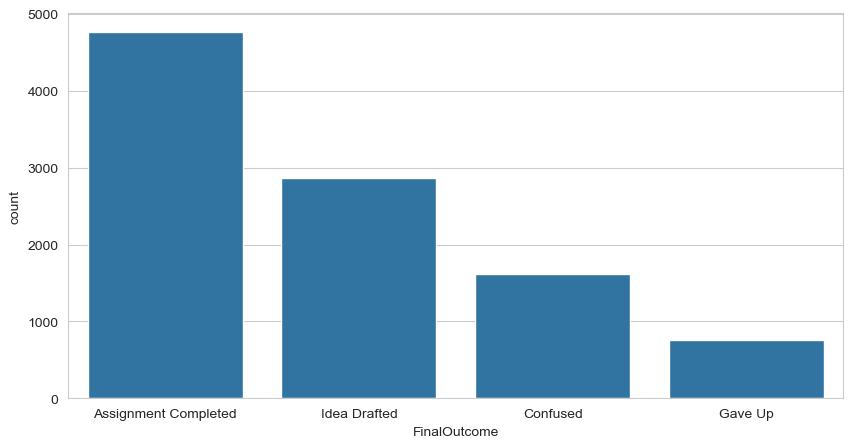

<Figure size 800x500 with 0 Axes>

In [13]:
sns.countplot(x="FinalOutcome",data=df)
plt.figure(figsize=(8,5))
plt.show()

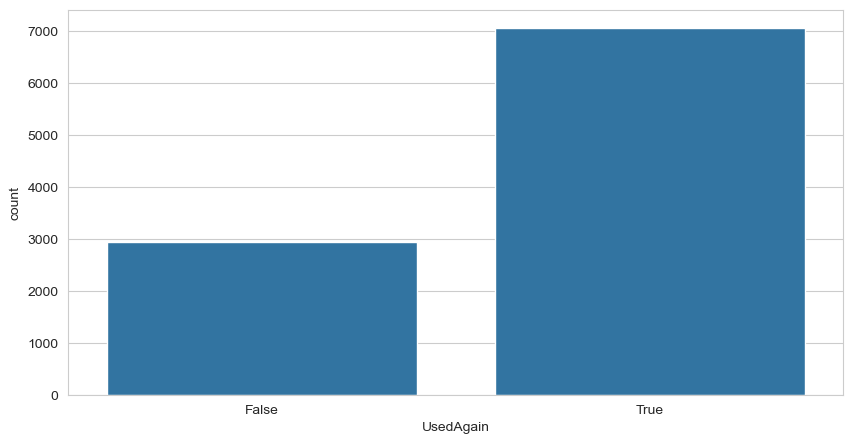

<Figure size 800x500 with 0 Axes>

In [14]:
sns.countplot(x="UsedAgain",data=df)
plt.figure(figsize=(8,5))
plt.show()

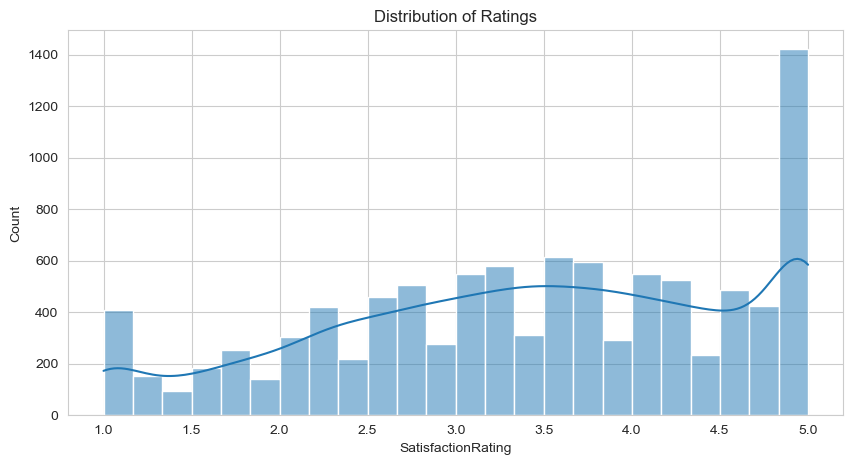

In [15]:
sns.histplot(df['SatisfactionRating'], kde=True)
plt.title('Distribution of Ratings')
plt.show()

### 2 : Bivariate analysis

#### Student bivariate analysis 

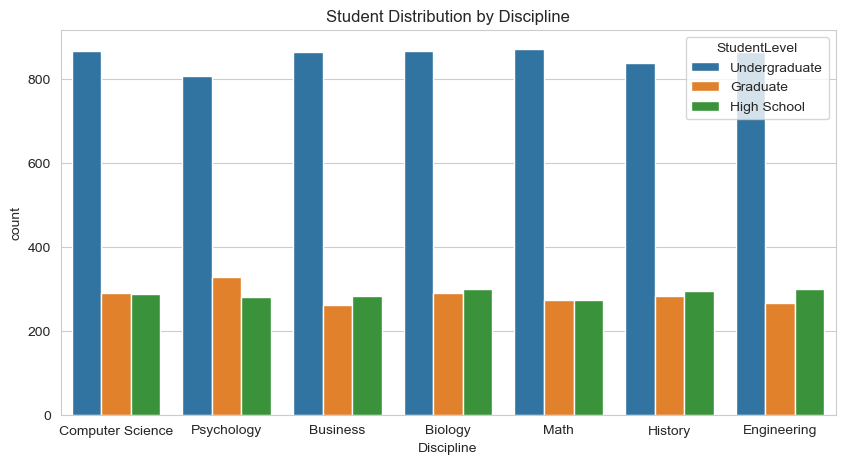

In [16]:
sns.countplot(x="Discipline",hue="StudentLevel",data=df)
plt.title("Student Distribution by Discipline")
plt.show()

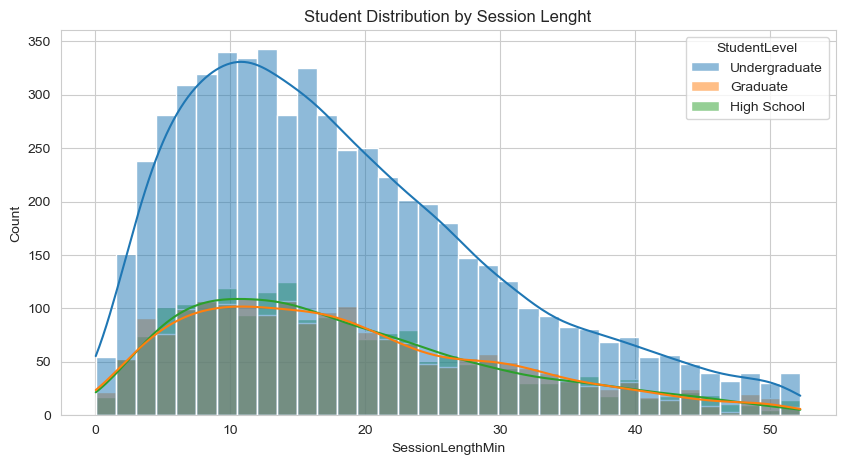

In [17]:
sns.histplot(x="SessionLengthMin",hue="StudentLevel",kde=True,data=df_clean)
plt.title("Student Distribution by Session Lenght")
plt.show()

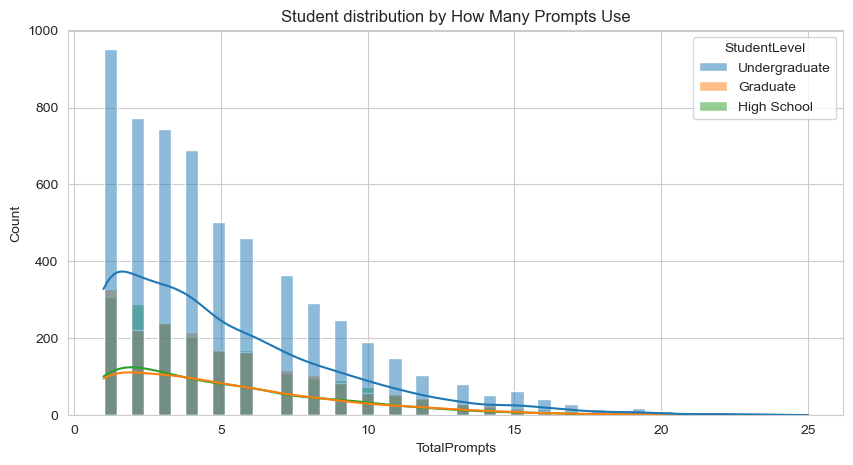

In [18]:
sns.histplot(x="TotalPrompts",hue="StudentLevel",kde=True,data=df_clean)
plt.title("Student distribution by How Many Prompts Use")
plt.show()

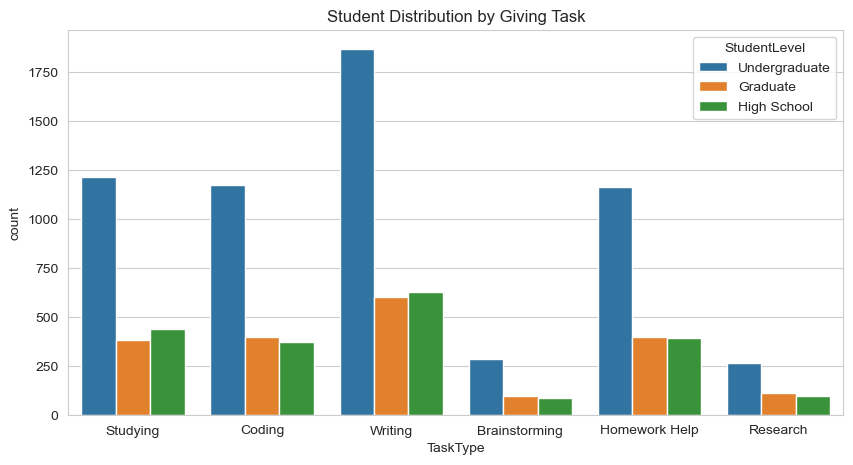

In [19]:
sns.countplot(x="TaskType",hue="StudentLevel",data=df)
plt.title("Student Distribution by Giving Task")
plt.show()

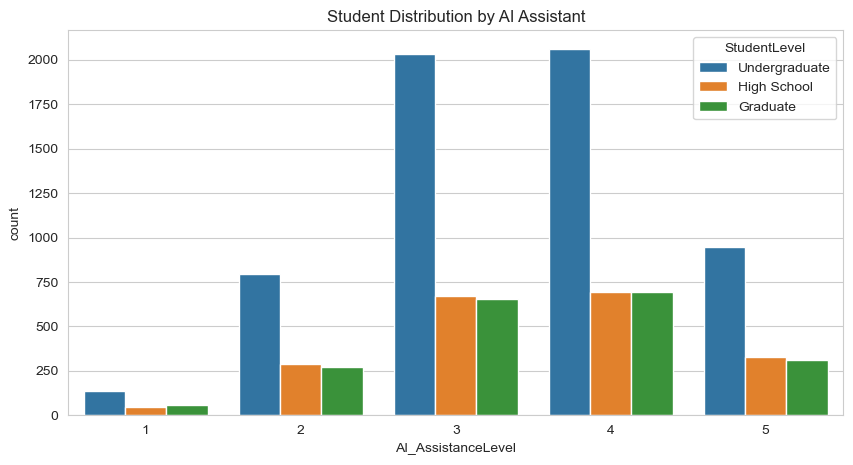

In [20]:
sns.countplot(x="AI_AssistanceLevel",hue="StudentLevel",data=df)
plt.title("Student Distribution by AI Assistant")
plt.show()

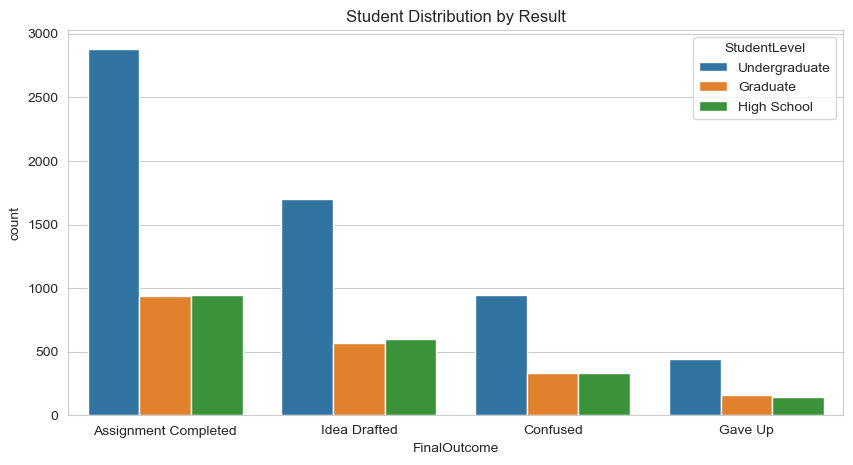

In [21]:
sns.countplot(x="FinalOutcome",hue="StudentLevel",data=df)
plt.title("Student Distribution by Result")
plt.show()

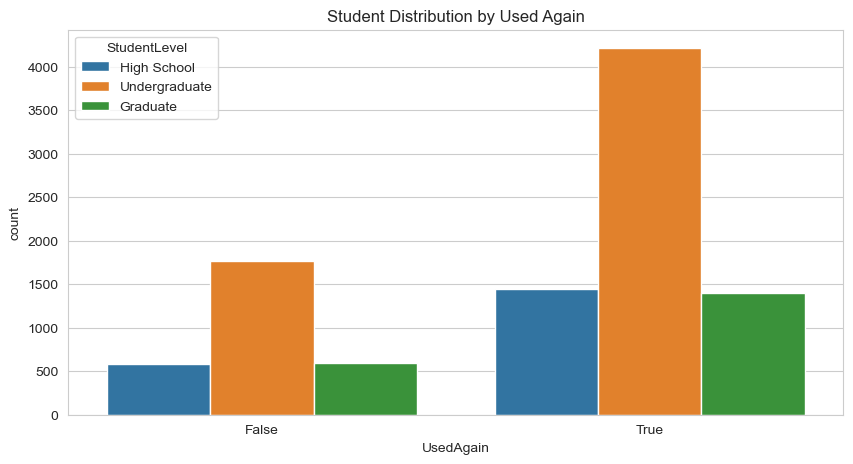

In [22]:
sns.countplot(x="UsedAgain",hue="StudentLevel",data=df)
plt.title("Student Distribution by Used Again")
plt.show()

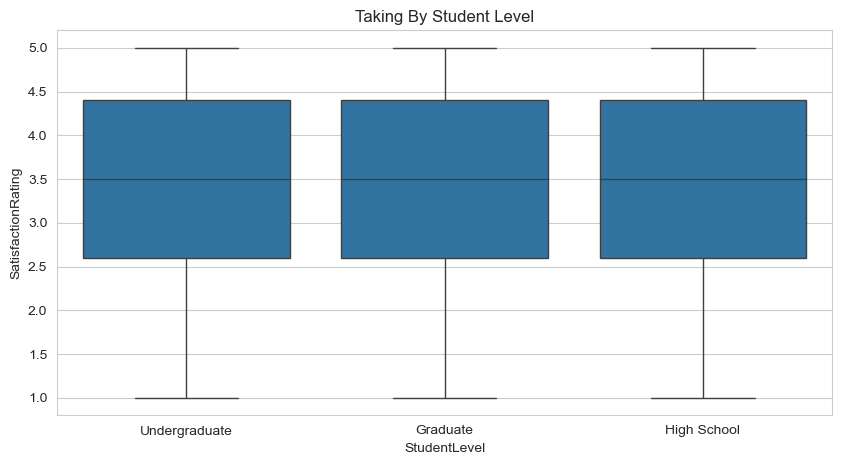

In [23]:
sns.boxplot(data=df,x='StudentLevel',y='SatisfactionRating',)
plt.title('Taking By Student Level')
plt.show()

#### 2 Disciplane Bivarite Analysis 

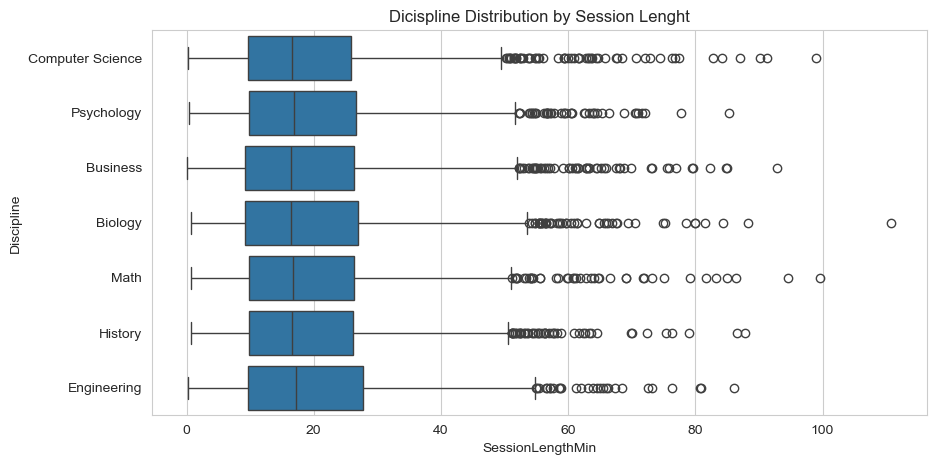

In [24]:
sns.boxplot(x="SessionLengthMin",y="Discipline",data=df)
plt.title("Dicispline Distribution by Session Lenght")
plt.show()

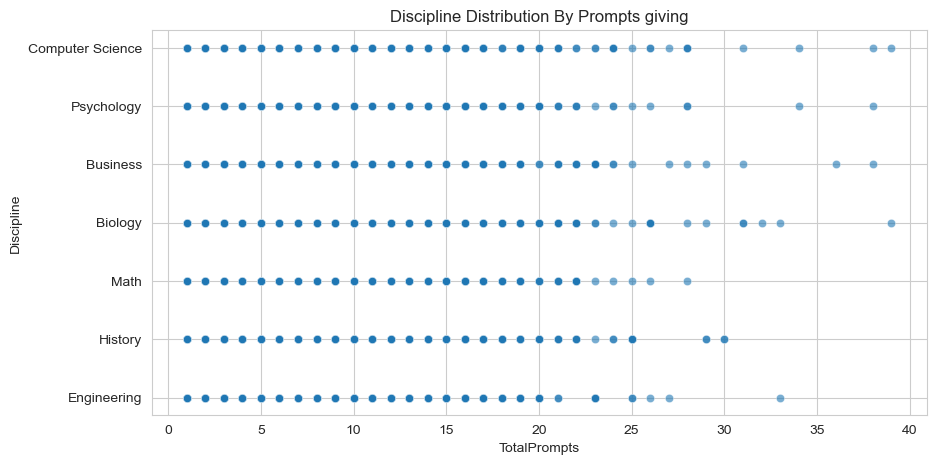

In [25]:
sns.scatterplot(data=df, x="TotalPrompts", y='Discipline', alpha=0.6)
# sns.histplot(x="",hue="",data=df)
plt.title("Discipline Distribution By Prompts giving")
plt.show()

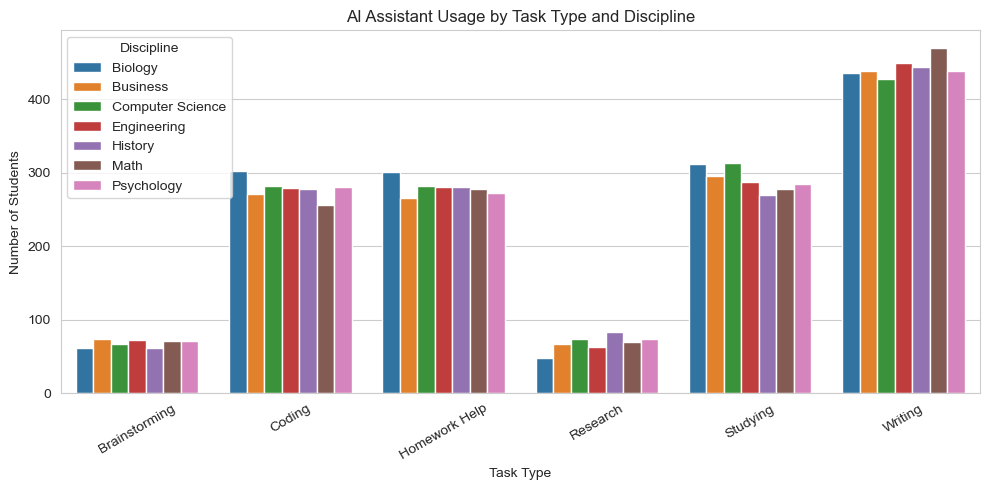

In [26]:
task_discipline_counts = (
    df.groupby(['TaskType', 'Discipline']).size().reset_index(name='Count')
)

sns.barplot(
    data=task_discipline_counts,
    x='TaskType',
    y='Count',
    hue='Discipline'
)

plt.title('AI Assistant Usage by Task Type and Discipline')
plt.xlabel('Task Type')
plt.ylabel('Number of Students')
plt.xticks(rotation=30)
plt.legend(title='Discipline')

plt.tight_layout()
plt.show()

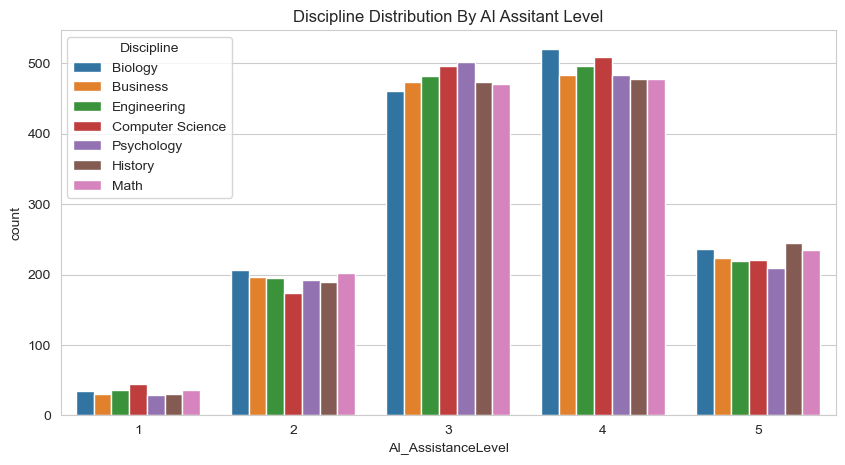

In [27]:
sns.countplot(data=df, x="AI_AssistanceLevel", hue='Discipline')
plt.title("Discipline Distribution By AI Assitant Level")
plt.show()

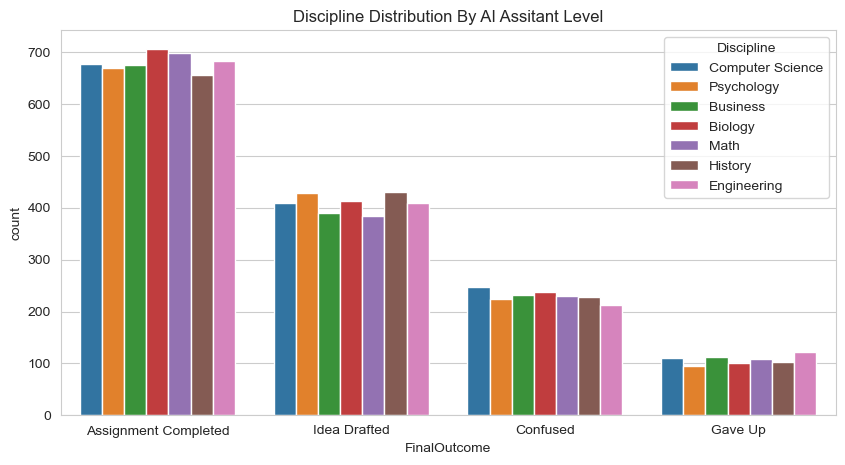

In [28]:
sns.countplot(data=df, x="FinalOutcome", hue='Discipline')
plt.title("Discipline Distribution By AI Assitant Level")
plt.show()

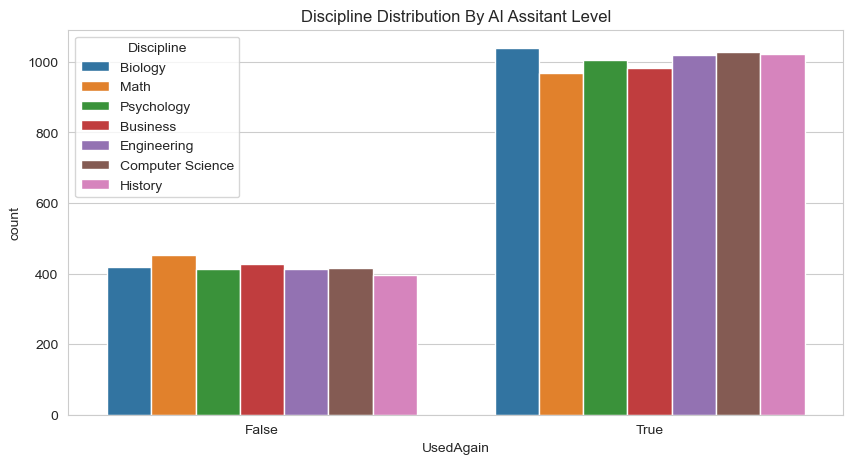

In [29]:
sns.countplot(data=df, x="UsedAgain", hue='Discipline')
plt.title("Discipline Distribution By AI Assitant Level")
plt.show()

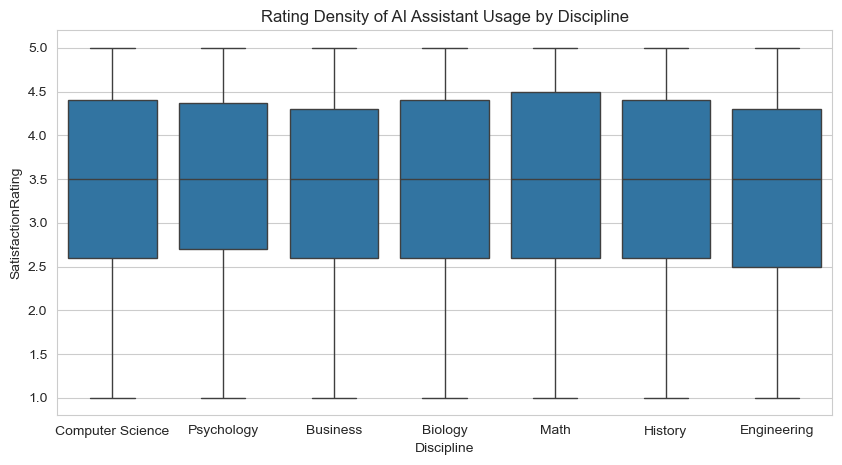

In [30]:
sns.boxplot(data=df,x='Discipline',y='SatisfactionRating',)
plt.title('Rating Density of AI Assistant Usage by Discipline')
plt.show()

#### 3 Session Lenght Bivarite Analysis

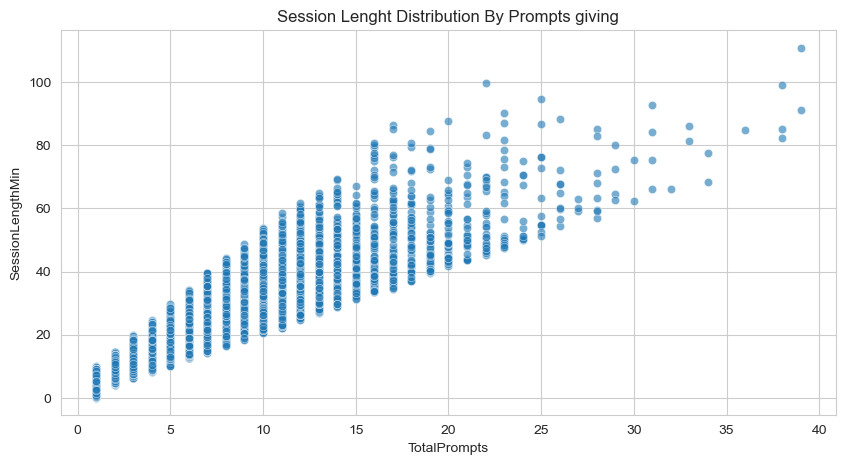

In [31]:
sns.scatterplot(data=df, x="TotalPrompts", y='SessionLengthMin', alpha=0.6)
plt.title("Session Lenght Distribution By Prompts giving")
plt.show()

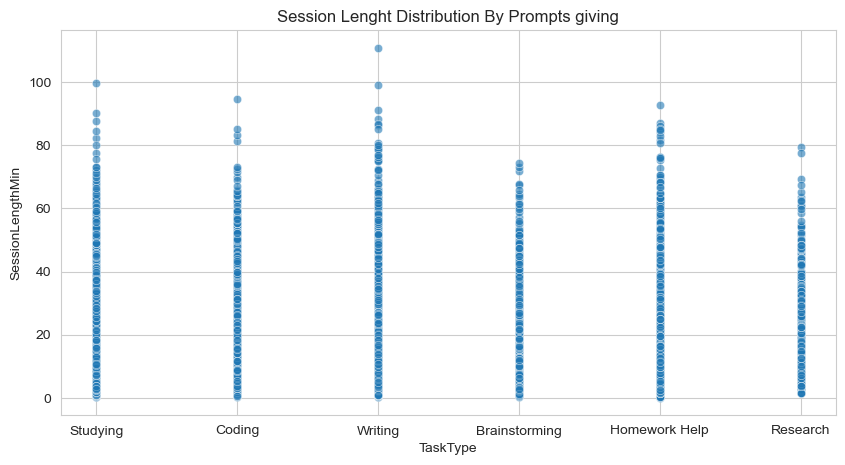

In [32]:
sns.scatterplot(data=df, x="TaskType", y='SessionLengthMin', alpha=0.6)
plt.title("Session Lenght Distribution By Prompts giving")
plt.show()

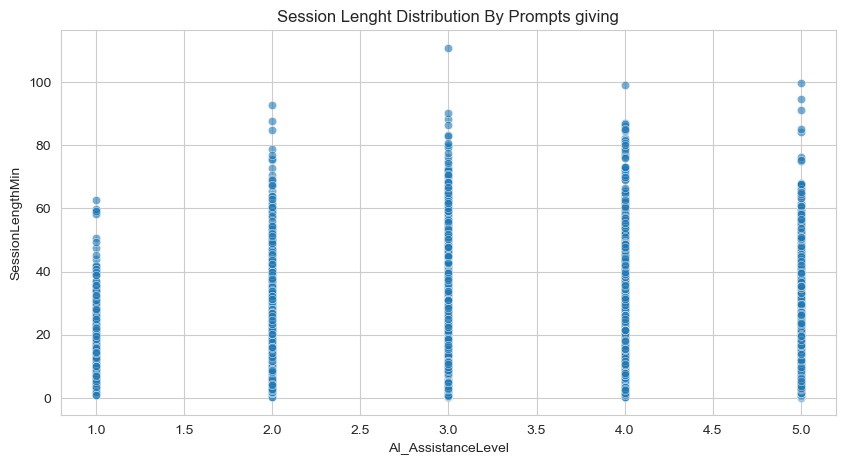

In [33]:
sns.scatterplot(data=df, x="AI_AssistanceLevel", y='SessionLengthMin', alpha=0.6)
plt.title("Session Lenght Distribution By Prompts giving")
plt.show()

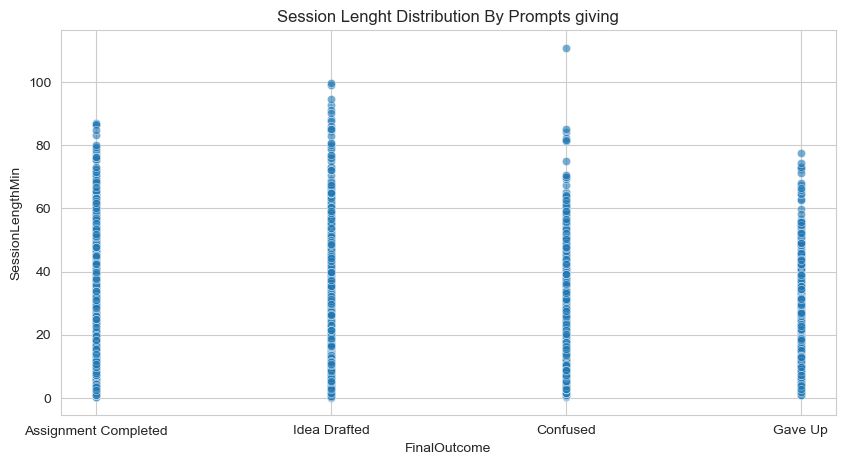

In [34]:
sns.scatterplot(data=df, x="FinalOutcome", y='SessionLengthMin', alpha=0.6)
plt.title("Session Lenght Distribution By Prompts giving")
plt.show()

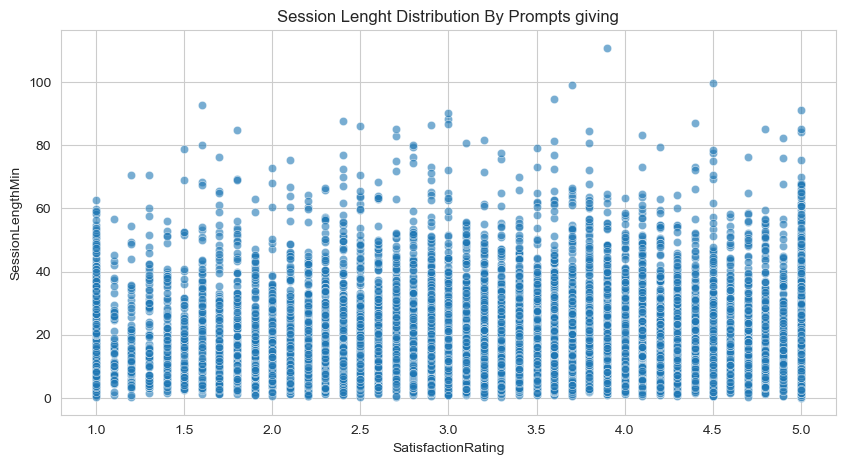

In [35]:
sns.scatterplot(data=df, x="SatisfactionRating", y='SessionLengthMin', alpha=0.6)
plt.title("Session Lenght Distribution By Prompts giving")
plt.show()

#### 4 Total Prompts Bivarite Analysis

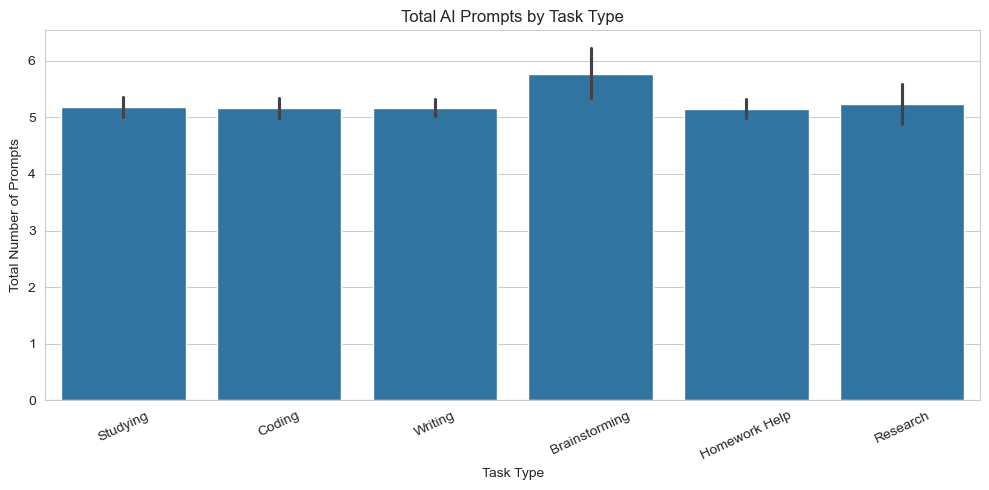

In [36]:
task_prompt_counts = (
    df['TaskType']
    .value_counts()
    .reset_index()
)

task_prompt_counts.columns = ['TaskType', 'TotalPrompts']

sns.barplot(
    data=df_clean,
    x='TaskType',
    y='TotalPrompts'
)

plt.title('Total AI Prompts giving by which Task')
plt.xlabel('Task Type')
plt.ylabel('Total Number of Prompts')
plt.xticks(rotation=25)

plt.tight_layout()
plt.show()

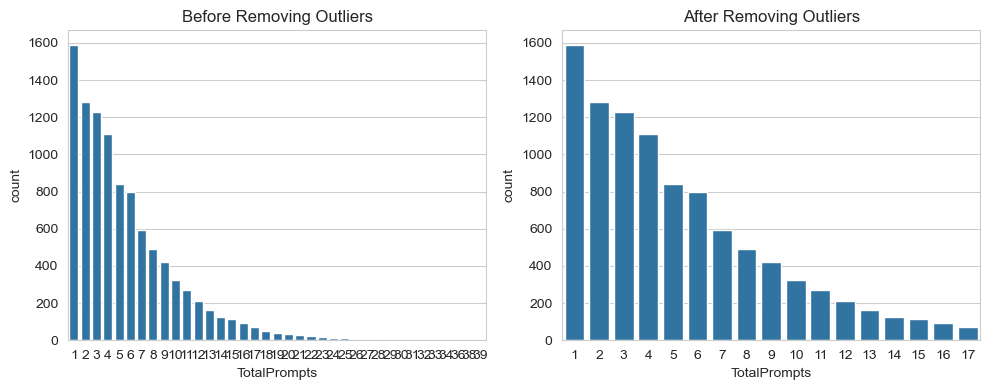

In [37]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

df_clean = remove_outliers_iqr(df, 'TotalPrompts')


plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.countplot(x=df['TotalPrompts'])
plt.title('Before Removing Outliers')

plt.subplot(1,2,2)
sns.countplot(x=df_clean['TotalPrompts'])
plt.title('After Removing Outliers')

plt.tight_layout()
plt.show()

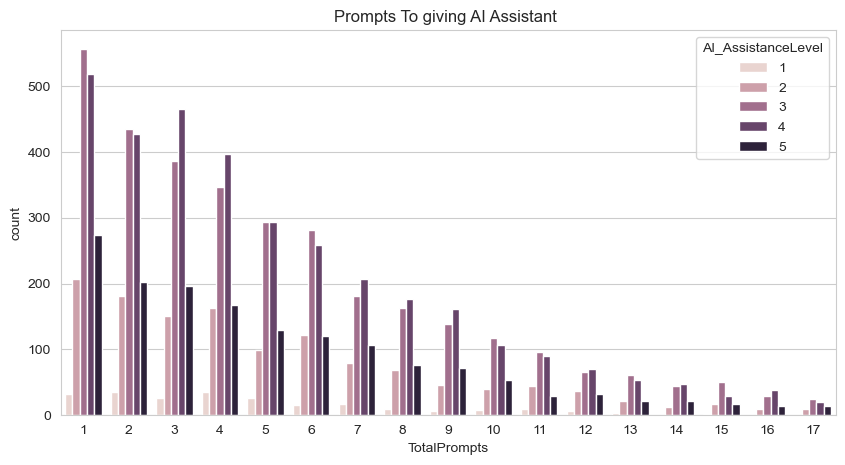

In [38]:
sns.countplot(x="TotalPrompts",hue="AI_AssistanceLevel",data=df_clean)
plt.title("Prompts To giving which AI Assistant level ")
plt.show()


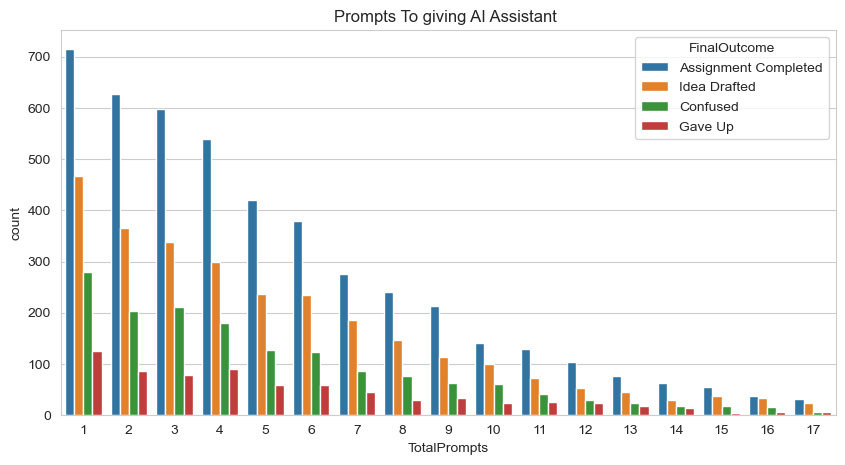

In [39]:
sns.countplot(x="TotalPrompts",hue="FinalOutcome",data=df_clean)
plt.title("Prompts To giving to whats outcome ")
plt.show()


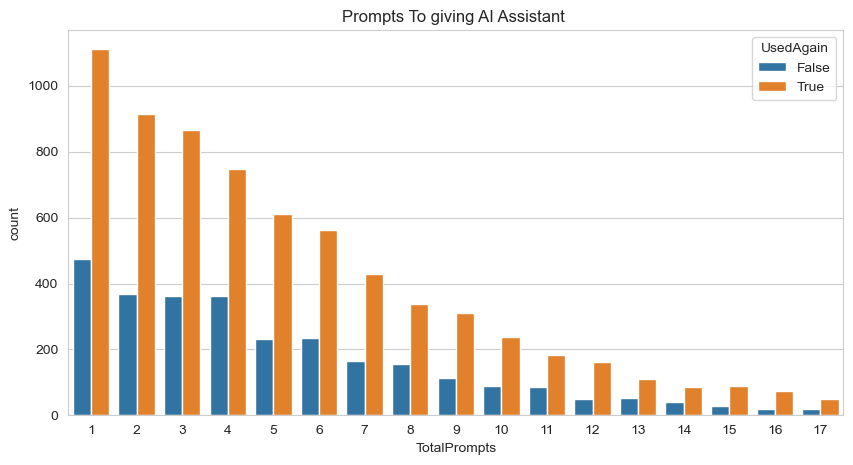

In [40]:
sns.countplot(x="TotalPrompts",hue="UsedAgain",data=df_clean)
plt.title("Prompts To giving AI which used again or not ")
plt.show()




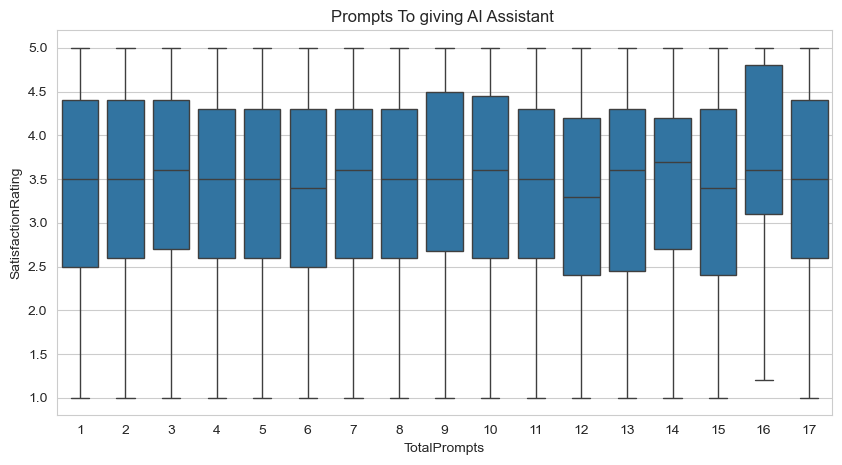

In [41]:
sns.boxplot(x="TotalPrompts",y="SatisfactionRating",data=df_clean)
plt.title("Prompts To giving AI so how mouch rating to AI ")
plt.show()




#### 5 Bivarite Tasktype Analysis

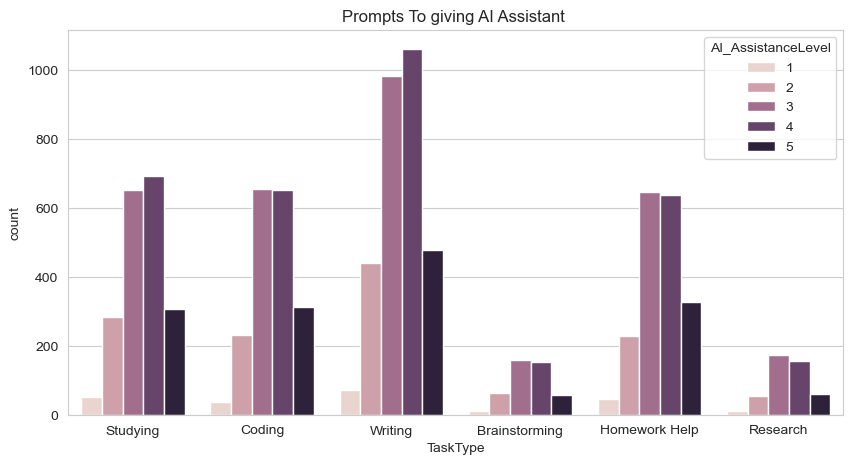

In [42]:
sns.countplot(x="TaskType",hue="AI_AssistanceLevel",data=df_clean)
plt.title("Task giving which AI Assistant level ")
plt.show()

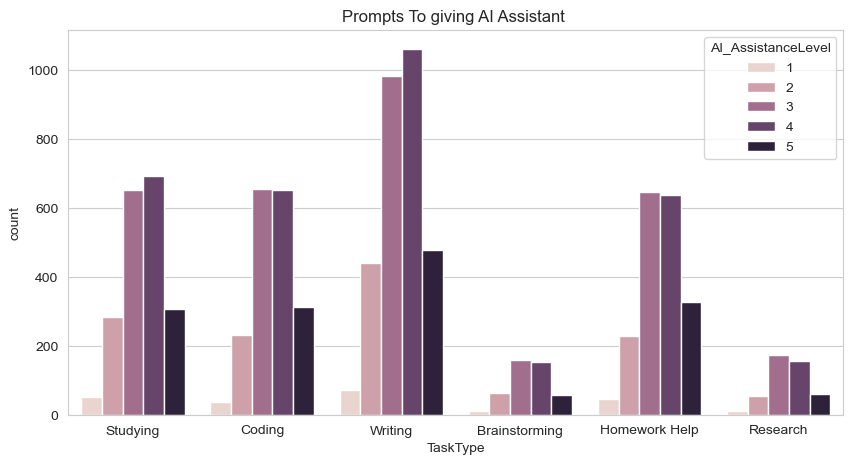

In [42]:
sns.countplot(x="TaskType",hue="FinalOutcome",data=df_clean)
plt.title("Task giving what come final result")
plt.show()

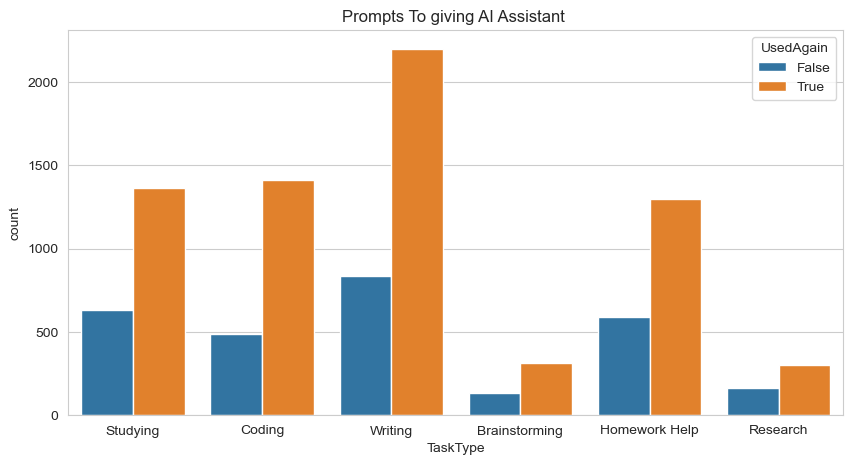

In [43]:
sns.countplot(x="TaskType",hue="UsedAgain",data=df_clean)
plt.title("Task was completed so its used again or not")
plt.show()

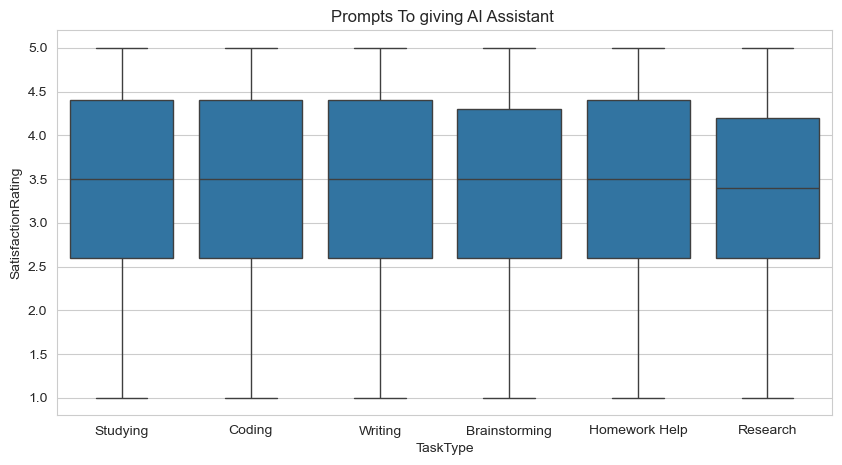

In [53]:
sns.boxplot(x="TaskType",y="SatisfactionRating",data=df_clean)
plt.title("Task was completed whats rating to give it")
plt.show()

#### 6 Bivarite AI-Assitant-Level Analysis

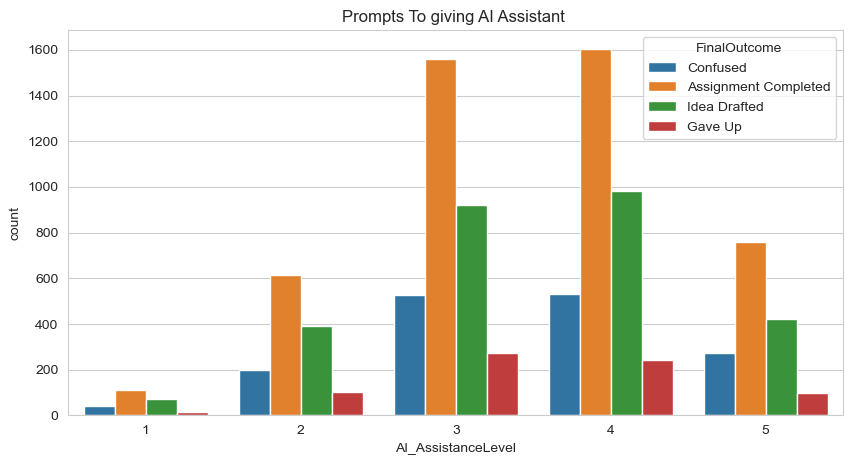

In [45]:
sns.countplot(x="AI_AssistanceLevel",hue="FinalOutcome",data=df_clean)
plt.title("Which AI level can get final outcome")
plt.show()




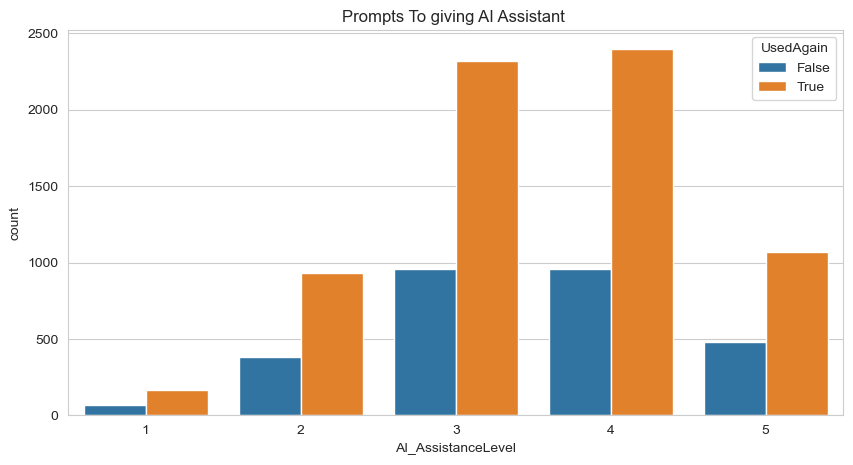

In [46]:
sns.countplot(x="AI_AssistanceLevel",hue="UsedAgain",data=df_clean)
plt.title("AI are used again or not")
plt.show()




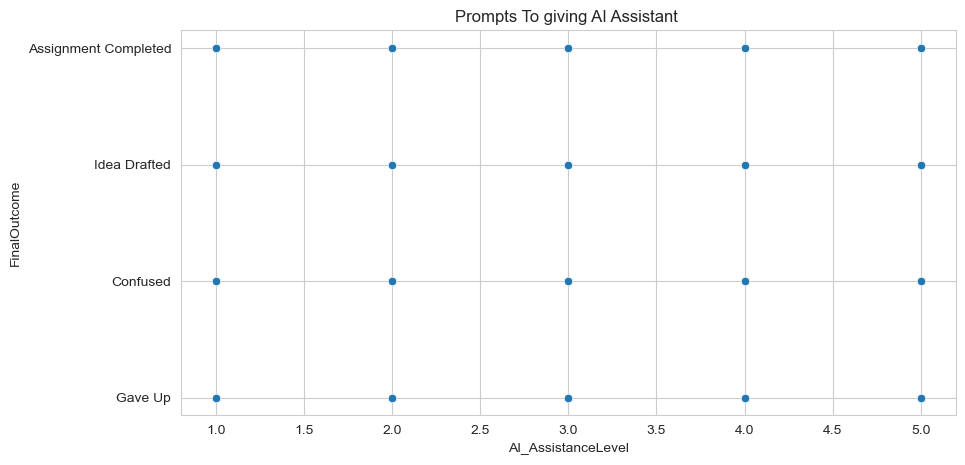

In [47]:
sns.scatterplot(x="AI_AssistanceLevel",y="FinalOutcome",data=df_clean)
plt.title("What are result after use AI")
plt.show()




#### 7 Bivarite Final Outcome Analysis

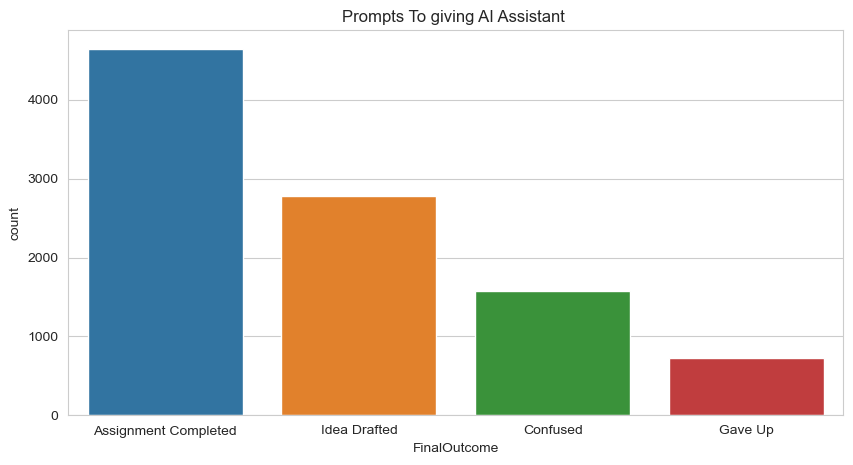

In [48]:
sns.countplot(x="FinalOutcome",hue="UsedAgain",data=df_clean)
plt.title("Task eas completed or get result so its ude again or not ")
plt.show()




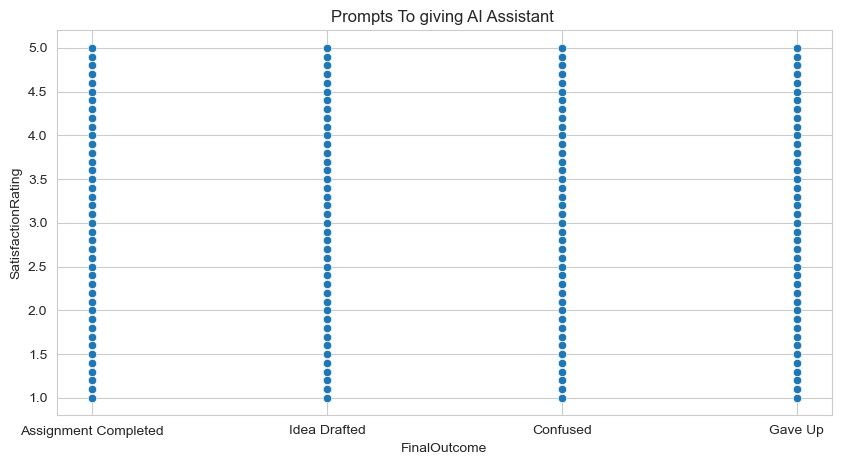

In [49]:
sns.scatterplot(x="FinalOutcome",y="SatisfactionRating",data=df_clean)
plt.title("FinalOutcome was so how much giving rating ")
plt.show()




#### 8 Bivarite SatisfactionRating Analysis

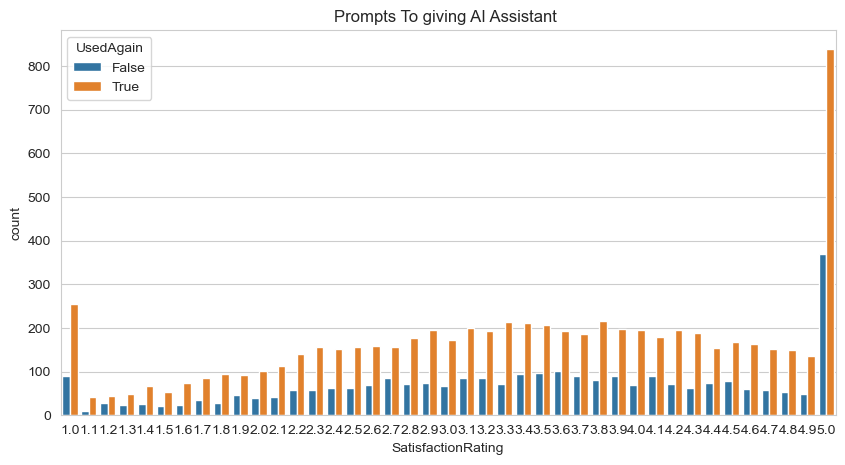

In [51]:
sns.countplot(x="SatisfactionRating",hue="UsedAgain",data=df_clean)
plt.title("Satisfaction rating VS  Used again")
plt.show()




#### Key Insights:
##### - Undergraduate students are the most active AI users.
##### - Technical disciplines show higher satisfaction levels.
##### - Short to medium sessions result in better satisfaction.
##### - Excessive prompts do not guarantee task completion.
#### Conclusion:
##### AI assistants play a strong supportive role in student academics,
##### especially for coding and writing tasks. Effective usage,
##### rather than heavy usage, leads to better outcomes.




### Final Recommendations:
#### 1. Optimize for Engagement: Satisfaction is highly correlated with AI Assistance Level. Improving the quality of initial responses can drive higher reuse rates.
#### 2. Targeted Support: Graduate students show different usage patterns than Undergraduates; AI tools should be tailored to the complexity of their tasks.
#### 3. Efficiency Matters: High prompt density in certain tasks suggests students might be struggling to get the right answer. Better prompt engineering guidance could help.
